In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [2]:
targetData = pd.read_csv("../../../stdcode6/dataset/feature_regression_example.csv")

In [3]:
targetData.dtypes

REGIONID         object
PRODUCTGROUP     object
PRODUCT          object
ITEM             object
YEARWEEK          int64
YEAR              int64
WEEK              int64
QTY               int64
HOLIDAY          object
HCLUS             int64
PROMOTION        object
PRO_PERCENT     float64
dtype: object

In [4]:
ynLabelEn = LabelEncoder()

In [7]:
targetData["HO_YN"] = ynLabelEn.fit_transform(targetData["HOLIDAY"])

In [8]:
targetData["PRO_YN"] = ynLabelEn.fit_transform(targetData["PROMOTION"])

In [9]:
targetData.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,0,1
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155,0,1
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155,1,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155,0,1


In [10]:
corrData = targetData.corr()

In [11]:
corrData

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,HO_YN,PRO_YN
YEARWEEK,1.000000,0.956598,0.275593,0.112267,-0.071586,0.404889,0.049867,0.205916
YEAR,0.956598,1.000000,-0.016493,0.028931,0.028593,0.321193,-0.031106,0.195931
WEEK,0.275593,-0.016493,1.000000,0.289766,-0.339943,0.329705,0.273710,0.060206
QTY,0.112267,0.028931,0.289766,1.000000,-0.537230,0.700195,0.505932,0.612451
HCLUS,-0.071586,0.028593,-0.339943,-0.537230,1.000000,-0.545619,-0.974601,-0.374072
PRO_PERCENT,0.404889,0.321193,0.329705,0.700195,-0.545619,1.000000,0.487062,0.898554
HO_YN,0.049867,-0.031106,0.273710,0.505932,-0.974601,0.487062,1.000000,0.365148
PRO_YN,0.205916,0.195931,0.060206,0.612451,-0.374072,0.898554,0.365148,1.000000


In [12]:
targetCorr = 0.5

In [13]:
features = list(corrData[((abs(corrData.QTY) >= targetCorr) &\
                          (abs(corrData.QTY) != 1))].index)

In [14]:
features

['HCLUS', 'PRO_PERCENT', 'HO_YN', 'PRO_YN']

In [15]:
featuresData = targetData[features]

In [16]:
label = ["QTY"]

In [17]:
labelData = targetData[label]

In [18]:
targetIndexRatio = 0.7

In [20]:
targetIndex = int(targetData.shape[0] * targetIndexRatio)

In [21]:
targetIndex

73

In [22]:
trainingFeatures = featuresData[:targetIndex]
trainingLabel = labelData[:targetIndex]
testFeatures = featuresData[targetIndex:]
testLabel = labelData[targetIndex:]

In [23]:
model_method = tree.DecisionTreeRegressor()

In [24]:
model = model_method.fit(trainingFeatures, trainingLabel)

In [25]:
predict = model.predict(testFeatures)

In [26]:
predictData = pd.DataFrame(predict, columns = {"predict"})

In [28]:
predictData.shape

(32, 1)

In [29]:
testLabel.shape

(32, 1)

In [32]:
testLabel = testLabel.reset_index(drop=True, inplace=False)

In [33]:
testLabel["DT_PREDICT"] = predictData

In [35]:
finalValue = testLabel

In [36]:
finalValue

,QTY,DT_PREDICT
0,2143,2783.6
1,2282,2783.6
2,973,2783.6
3,21,367.2
4,968,2783.6
5,1685,2783.6
6,1586,2783.6
7,1616,2783.6
8,1318,2783.6
9,2240,2783.6


In [39]:
analysisData = pd.read_csv("../../../Desktop/targetDatas.csv")

In [40]:
analysisData

,모델정확도,15:00~,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,모델,ITEM,연주차정보,정답지,예측값
1,A,A정석카드,202310,100,50
2,A,A정석카드,202311,100,50
3,A,A정석카드,202312,100,50
4,A,A정석카드,202313,100,50
5,A,A정석카드,202314,100,50
6,B,A정석카드,202310,100,100
7,B,A정석카드,202311,100,100
8,B,A정석카드,202312,100,100
9,B,A정석카드,202313,100,100


In [42]:
model_method2 = tree.DecisionTreeRegressor()

In [45]:
analysisLabel1 = analysisData.iloc[:6]

In [46]:
analysisLabel1

,모델정확도,15:00~,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,모델,ITEM,연주차정보,정답지,예측값
1,A,A정석카드,202310,100,50
2,A,A정석카드,202311,100,50
3,A,A정석카드,202312,100,50
4,A,A정석카드,202313,100,50
5,A,A정석카드,202314,100,50


In [79]:
analysis1Features = analysisLabel1["Unnamed: 3"][1:]
analysis1Predict = analysisLabel1["Unnamed: 4"][1:]

In [80]:
anal1 = analysis1Features.reset_index(drop=True, inplace = False)
pre1 = analysis1Predict.reset_index(drop=True, inplace = False)

In [69]:
anal1

0    100
1    100
2    100
3    100
4    100
Name: Unnamed: 3, dtype: object

In [75]:
label1 = pd.DataFrame(anal1)

In [81]:
predict1 = pd.DataFrame(pre1)

In [82]:
predict1

,Unnamed: 4
0,50
1,50
2,50
3,50
4,50


In [47]:
analysisLabel2 = analysisData.iloc[6:]

In [48]:
analysisLabel2

,모델정확도,15:00~,Unnamed: 2,Unnamed: 3,Unnamed: 4
6,B,A정석카드,202310,100,100
7,B,A정석카드,202311,100,100
8,B,A정석카드,202312,100,100
9,B,A정석카드,202313,100,100
10,B,A정석카드,202314,100,350


In [83]:
anal2 = analysisLabel2["Unnamed: 3"][:].reset_index(drop=True, inplace=False)
pre2 = analysisLabel2["Unnamed: 4"][:].reset_index(drop=True, inplace=False)

In [73]:
anal2

0    100
1    100
2    100
3    100
4    100
Name: Unnamed: 3, dtype: object

In [77]:
label2 = pd.DataFrame(anal2)

In [78]:
label2

,Unnamed: 3
0,100
1,100
2,100
3,100
4,100


In [85]:
predict2 = pd.DataFrame(pre2)

In [86]:
predict2

,Unnamed: 4
0,100
1,100
2,100
3,100
4,350


In [87]:
mean_absolute_error(label1, predict1)

50.0

In [88]:
mean_absolute_error(label2, predict2)

50.0

In [89]:
mean_squared_error(label1, predict1)

2500.0

In [90]:
mean_squared_error(label2, predict2)

12500.0

In [91]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [95]:
mean_absolute_error(y_true=finalValue["QTY"], \
                    y_pred=finalValue["DT_PREDICT"])

962.30625

In [97]:
np.sqrt(mean_squared_error(y_true=finalValue["QTY"], \
                           y_pred=finalValue["DT_PREDICT"]))

1109.0047334209173

In [ ]:
# 2배 이상 차이가 없다면 그냥저냥 괜찮은 모델

In [98]:
from sklearn.metrics import mean_absolute_percentage_error

In [101]:
MAPE = mean_absolute_percentage_error(y_true=finalValue["QTY"], \
                                      y_pred=finalValue["DT_PREDICT"])

In [103]:
abs(1-MAPE)

0.6390040465654874

In [ ]:
# 약 63.9%의 모델 예측 능력을 지닌다.

In [104]:
finalValue["DIFF"] = abs(finalValue["QTY"]) - abs(finalValue["DT_PREDICT"])

In [105]:
finalValue

,QTY,DT_PREDICT,DIFF
0,2143,2783.6,-640.6
1,2282,2783.6,-501.6
2,973,2783.6,-1810.6
3,21,367.2,-346.2
4,968,2783.6,-1815.6
5,1685,2783.6,-1098.6
6,1586,2783.6,-1197.6
7,1616,2783.6,-1167.6
8,1318,2783.6,-1465.6
9,2240,2783.6,-543.6


In [106]:
from sklearn import tree
from sklearn import linear_model

In [107]:
lrModel = linear_model.LinearRegression()

In [108]:
dtModel = tree.DecisionTreeRegressor(random_state=10)

In [109]:
features

['HCLUS', 'PRO_PERCENT', 'HO_YN', 'PRO_YN']

In [129]:
inHculs = 1 # 대휴일
inPropercent = 0.4 # 프로모션 비율
inPRO_YN = 0 # Y : 1, N : 0
inHO_YN = 0 # Y : 1, N : 0

simulData = pd.DataFrame([[inHculs, inPropercent, inPRO_YN, inHO_YN]])

In [130]:
simulData

,0,1,2,3
0,1,0.4,0,0


In [131]:
dtModels = dtModel.fit(trainingFeatures, trainingLabel)

In [132]:
dtModels.predict(simulData)

C:\Users\SMART16\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([2193.8])

In [133]:
from sklearn.tree import plot_tree

[Text(0.6346153846153846, 0.9285714285714286, 'X[1] <= 0.259\nsquared_error = 687177.89\nsamples = 73\nvalue = 1064.973'),
 Text(0.4230769230769231, 0.7857142857142857, 'X[3] <= 0.5\nsquared_error = 285050.27\nsamples = 63\nvalue = 838.984'),
 Text(0.23076923076923078, 0.6428571428571429, 'X[0] <= 3.0\nsquared_error = 73288.876\nsamples = 22\nvalue = 349.818'),
 Text(0.15384615384615385, 0.5, 'X[0] <= 1.5\nsquared_error = 25921.0\nsamples = 2\nvalue = 176.0'),
 Text(0.07692307692307693, 0.35714285714285715, 'squared_error = 0.0\nsamples = 1\nvalue = 337.0'),
 Text(0.23076923076923078, 0.35714285714285715, 'squared_error = 0.0\nsamples = 1\nvalue = 15.0'),
 Text(0.3076923076923077, 0.5, 'squared_error = 74702.26\nsamples = 20\nvalue = 367.2'),
 Text(0.6153846153846154, 0.6428571428571429, 'X[0] <= 3.0\nsquared_error = 201387.029\nsamples = 41\nvalue = 1101.463'),
 Text(0.46153846153846156, 0.5, 'X[1] <= 0.224\nsquared_error = 165625.976\nsamples = 13\nvalue = 1398.154'),
 Text(0.3846153

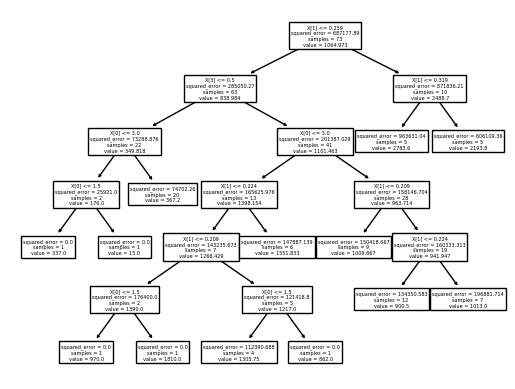

In [134]:
plot_tree(dtModels)

### 훈련된 모델을 저장할 수 있다. 확장자 : pickle로!

In [ ]:
### Groupby + @. 

In [ ]:
# Groupby 없는 분석은 존재할 수 없다!

In [135]:
# import pandas as pd

# data450 = pd.read_csv("../dataset/kopo_450data.csv")

# data450.shape

# ### 피클 파일 저장하기 (바이너리) ###
# with open("data450.pickle","wb") as fw:
#     pickle.dump(data450,fw)

# ### 피클 파일 불러오기 (바이너리) ###
# with open("data450.pickle","rb") as fr:
#     data = pickle.load(fr)

# data.head(2)

In [136]:
import pickle

In [139]:
with open("dtModels.pickle", "wb") as fw:
    pickle.dump(dtModels, fw)

In [138]:
with open("dtModels.pickle", "rb") as fr:
    data = pickle.load(fr)